In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

In [2]:
df_all = pd.read_csv('data/cleaned.csv')
len(df_all)

593956

In [3]:
df_all = df_all.set_index(pd.to_datetime(df_all['localminute']), drop=True)
df_all = df_all.drop(columns=['Unnamed: 0', 'localminute'])
display(df_all.head(), len(df_all))

marginal_change  cumul_value  meterid
localminute                                               
2015-10-01 05:00:00              0.0      93470.0       35
2015-10-01 06:00:00              0.0      93470.0       35
2015-10-01 07:00:00              0.0      93470.0       35
2015-10-01 08:00:00              0.0      93470.0       35
2015-10-01 09:00:00              0.0      93470.0       35

593956

In [4]:
df_weather = pd.read_csv('data/WeatherDataOctMar.csv')
display(df_weather.head())

Date  TempAvgF  HumidityAvgPercent  WindAvgMPH
0  2015-10-01        82                  52           4
1  2015-10-02        78                  45           5
2  2015-10-03        72                  40           3
3  2015-10-04        73                  45           2
4  2015-10-05        76                  45           2

In [5]:
df_weather = df_weather.set_index(pd.to_datetime(df_weather['Date']), drop=True)
df_weather = df_weather.drop(columns=['Date'])

In [6]:
df_new = df_all.join(df_weather)
df_new.head()

marginal_change  cumul_value  meterid  TempAvgF  \
2015-10-01 05:00:00              0.0      93470.0       35       NaN   
2015-10-01 05:00:00              0.0     116642.0       94       NaN   
2015-10-01 05:00:00              0.0     128294.0      114       NaN   
2015-10-01 05:00:00              0.0     263272.0      187       NaN   
2015-10-01 05:00:00              0.0     612262.0      222       NaN   

                     HumidityAvgPercent  WindAvgMPH  
2015-10-01 05:00:00                 NaN         NaN  
2015-10-01 05:00:00                 NaN         NaN  
2015-10-01 05:00:00                 NaN         NaN  
2015-10-01 05:00:00                 NaN         NaN  
2015-10-01 05:00:00                 NaN         NaN

### The next few cells check that the weather data is appended correctly

In [10]:
tmp_groups = df_new.groupby('meterid')
tmp_keys = tmp_groups.groups.keys()
tmp_keys

dict_keys([35, 44, 77, 94, 114, 187, 222, 252, 370, 483, 484, 661, 739, 744, 871, 1042, 1086, 1103, 1185, 1283, 1403, 1415, 1507, 1556, 1589, 1619, 1697, 1714, 1718, 1790, 1791, 1792, 1800, 1801, 2018, 2034, 2072, 2094, 2129, 2233, 2335, 2378, 2449, 2461, 2470, 2575, 2638, 2755, 2814, 2818, 2945, 2946, 2965, 2980, 3036, 3039, 3134, 3310, 3367, 3527, 3544, 3577, 3635, 3723, 3778, 3849, 3893, 3918, 4029, 4031, 4193, 4228, 4296, 4352, 4356, 4373, 4421, 4447, 4514, 4732, 4767, 4998, 5129, 5131, 5193, 5275, 5317, 5395, 5403, 5439, 5484, 5636, 5658, 5785, 5810, 5814, 5892, 5972, 6412, 6505, 6578, 6673, 6685, 6830, 6836, 6863, 6910, 7016, 7017, 7030, 7117, 7287, 7429, 7460, 7674, 7682, 7739, 7741, 7794, 7900, 7919, 7965, 7989, 8059, 8084, 8086, 8155, 8156, 8244, 8386, 8467, 8703, 8829, 8890, 8967, 9052, 9121, 9134, 9160, 9278, 9295, 9474, 9600, 9631, 9639, 9729, 9766, 9849, 9956, 9982])

In [11]:
df_i = tmp_groups.get_group(35)
df_i.head()

marginal_change  cumul_value  meterid  TempAvgF  \
2015-10-01 05:00:00              0.0      93470.0       35       NaN   
2015-10-01 06:00:00              0.0      93470.0       35       NaN   
2015-10-01 07:00:00              0.0      93470.0       35       NaN   
2015-10-01 08:00:00              0.0      93470.0       35       NaN   
2015-10-01 09:00:00              0.0      93470.0       35       NaN   

                     HumidityAvgPercent  WindAvgMPH  
2015-10-01 05:00:00                 NaN         NaN  
2015-10-01 06:00:00                 NaN         NaN  
2015-10-01 07:00:00                 NaN         NaN  
2015-10-01 08:00:00                 NaN         NaN  
2015-10-01 09:00:00                 NaN         NaN

In [12]:
df_i.tail(30)

marginal_change  cumul_value  meterid  TempAvgF  \
2016-03-30 23:00:00              2.0     104632.0       35       NaN   
2016-03-31 00:00:00              0.0     104632.0       35      76.0   
2016-03-31 01:00:00             10.0     104642.0       35       NaN   
2016-03-31 02:00:00              4.0     104646.0       35       NaN   
2016-03-31 03:00:00              0.0     104646.0       35       NaN   
2016-03-31 04:00:00              0.0     104646.0       35       NaN   
2016-03-31 05:00:00              0.0     104646.0       35       NaN   
2016-03-31 06:00:00              2.0     104648.0       35       NaN   
2016-03-31 07:00:00              0.0     104648.0       35       NaN   
2016-03-31 08:00:00              0.0     104648.0       35       NaN   
2016-03-31 09:00:00              0.0     104648.0       35       NaN   
2016-03-31 10:00:00              0.0     104648.0       35       NaN   
2016-03-31 11:00:00              0.0     104648.0       35       NaN   
2016-03-31 12:00:00              0.0     104648.0       35       NaN   
2016-03-31 13:00:00             14.0     104662.0       35       NaN   
2016-03-31 14:00:00              0.0     104662.0       35       NaN   
2016-03-31 15:00:00              2.0     104664.0       35       NaN   
2016-03-31 16:00:00              8.0     104672.0       35       NaN   
2016-03-31 17:00:00              0.0     104672.0       35       NaN   
2016-03-31 18:00:00              0.0     104672.0       35       NaN   
2016-03-31 19:00:00              0.0     104672.0       35       NaN   
2016-03-31 20:00:00              2.0     104674.0       35       NaN   
2016-03-31 21:00:00              0.0     104674.0       35       NaN   
2016-03-31 22:00:00              0.0     104674.0       35       NaN   
2016-03-31 23:00:00              0.0     104674.0       35       NaN   
2016-04-01 00:00:00             10.0     104684.0       35       NaN   
2016-04-01 01:00:00              0.0     104684.0       35       NaN   
2016-04-01 02:00:00              2.0     104686.0       35       NaN   
2016-04-01 03:00:00              6.0     104692.0       35       NaN   
2016-04-01 04:00:00              2.0     104694.0       35       NaN   

                     HumidityAvgPercent  WindAvgMPH  
2016-03-30 23:00:00                 NaN         NaN  
2016-03-31 00:00:00                59.0         5.0  
2016-03-31 01:00:00                 NaN         NaN  
2016-03-31 02:00:00                 NaN         NaN  
2016-03-31 03:00:00                 NaN         NaN  
2016-03-31 04:00:00                 NaN         NaN  
2016-03-31 05:00:00                 NaN         NaN  
2016-03-31 06:00:00                 NaN         NaN  
2016-03-31 07:00:00                 NaN         NaN  
2016-03-31 08:00:00                 NaN         NaN  
2016-03-31 09:00:00                 NaN         NaN  
2016-03-31 10:00:00                 NaN         NaN  
2016-03-31 11:00:00                 NaN         NaN  
2016-03-31 12:00:00                 NaN         NaN  
2016-03-31 13:00:00                 NaN         NaN  
2016-03-31 14:00:00                 NaN         NaN  
2016-03-31 15:00:00                 NaN         NaN  
2016-03-31 16:00:00                 NaN         NaN  
2016-03-31 17:00:00                 NaN         NaN  
2016-03-31 18:00:00                 NaN         NaN  
2016-03-31 19:00:00                 NaN         NaN  
2016-03-31 20:00:00                 NaN         NaN  
2016-03-31 21:00:00                 NaN         NaN  
2016-03-31 22:00:00                 NaN         NaN  
2016-03-31 23:00:00                 NaN         NaN  
2016-04-01 00:00:00                 NaN         NaN  
2016-04-01 01:00:00                 NaN         NaN  
2016-04-01 02:00:00                 NaN         NaN  
2016-04-01 03:00:00                 NaN         NaN  
2016-04-01 04:00:00                 NaN         NaN

In [13]:
df_i_new = df_i.ffill()
df_i_new.tail(30)

marginal_change  cumul_value  meterid  TempAvgF  \
2016-03-30 23:00:00              2.0     104632.0       35      73.0   
2016-03-31 00:00:00              0.0     104632.0       35      76.0   
2016-03-31 01:00:00             10.0     104642.0       35      76.0   
2016-03-31 02:00:00              4.0     104646.0       35      76.0   
2016-03-31 03:00:00              0.0     104646.0       35      76.0   
2016-03-31 04:00:00              0.0     104646.0       35      76.0   
2016-03-31 05:00:00              0.0     104646.0       35      76.0   
2016-03-31 06:00:00              2.0     104648.0       35      76.0   
2016-03-31 07:00:00              0.0     104648.0       35      76.0   
2016-03-31 08:00:00              0.0     104648.0       35      76.0   
2016-03-31 09:00:00              0.0     104648.0       35      76.0   
2016-03-31 10:00:00              0.0     104648.0       35      76.0   
2016-03-31 11:00:00              0.0     104648.0       35      76.0   
2016-03-31 12:00:00              0.0     104648.0       35      76.0   
2016-03-31 13:00:00             14.0     104662.0       35      76.0   
2016-03-31 14:00:00              0.0     104662.0       35      76.0   
2016-03-31 15:00:00              2.0     104664.0       35      76.0   
2016-03-31 16:00:00              8.0     104672.0       35      76.0   
2016-03-31 17:00:00              0.0     104672.0       35      76.0   
2016-03-31 18:00:00              0.0     104672.0       35      76.0   
2016-03-31 19:00:00              0.0     104672.0       35      76.0   
2016-03-31 20:00:00              2.0     104674.0       35      76.0   
2016-03-31 21:00:00              0.0     104674.0       35      76.0   
2016-03-31 22:00:00              0.0     104674.0       35      76.0   
2016-03-31 23:00:00              0.0     104674.0       35      76.0   
2016-04-01 00:00:00             10.0     104684.0       35      76.0   
2016-04-01 01:00:00              0.0     104684.0       35      76.0   
2016-04-01 02:00:00              2.0     104686.0       35      76.0   
2016-04-01 03:00:00              6.0     104692.0       35      76.0   
2016-04-01 04:00:00              2.0     104694.0       35      76.0   

                     HumidityAvgPercent  WindAvgMPH  
2016-03-30 23:00:00                88.0         7.0  
2016-03-31 00:00:00                59.0         5.0  
2016-03-31 01:00:00                59.0         5.0  
2016-03-31 02:00:00                59.0         5.0  
2016-03-31 03:00:00                59.0         5.0  
2016-03-31 04:00:00                59.0         5.0  
2016-03-31 05:00:00                59.0         5.0  
2016-03-31 06:00:00                59.0         5.0  
2016-03-31 07:00:00                59.0         5.0  
2016-03-31 08:00:00                59.0         5.0  
2016-03-31 09:00:00                59.0         5.0  
2016-03-31 10:00:00                59.0         5.0  
2016-03-31 11:00:00                59.0         5.0  
2016-03-31 12:00:00                59.0         5.0  
2016-03-31 13:00:00                59.0         5.0  
2016-03-31 14:00:00                59.0         5.0  
2016-03-31 15:00:00                59.0         5.0  
2016-03-31 16:00:00                59.0         5.0  
2016-03-31 17:00:00                59.0         5.0  
2016-03-31 18:00:00                59.0         5.0  
2016-03-31 19:00:00                59.0         5.0  
2016-03-31 20:00:00                59.0         5.0  
2016-03-31 21:00:00                59.0         5.0  
2016-03-31 22:00:00                59.0         5.0  
2016-03-31 23:00:00                59.0         5.0  
2016-04-01 00:00:00                59.0         5.0  
2016-04-01 01:00:00                59.0         5.0  
2016-04-01 02:00:00                59.0         5.0  
2016-04-01 03:00:00                59.0         5.0  
2016-04-01 04:00:00                59.0         5.0

In [16]:
df_i.head()

marginal_change  cumul_value  meterid  TempAvgF  \
2015-10-01 05:00:00              0.0      93470.0       35       NaN   
2015-10-01 06:00:00              0.0      93470.0       35       NaN   
2015-10-01 07:00:00              0.0      93470.0       35       NaN   
2015-10-01 08:00:00              0.0      93470.0       35       NaN   
2015-10-01 09:00:00              0.0      93470.0       35       NaN   

                     HumidityAvgPercent  WindAvgMPH  
2015-10-01 05:00:00                 NaN         NaN  
2015-10-01 06:00:00                 NaN         NaN  
2015-10-01 07:00:00                 NaN         NaN  
2015-10-01 08:00:00                 NaN         NaN  
2015-10-01 09:00:00                 NaN         NaN

In [14]:
# df_i's data does not always start from the 0th hour of the day so bfill(). 
# we could find the relevant entry from df_weather but that is tedious. can be done next time.
df_i = df_i.bfill()
df_i.head()

marginal_change  cumul_value  meterid  TempAvgF  \
2015-10-01 05:00:00              0.0      93470.0       35      78.0   
2015-10-01 06:00:00              0.0      93470.0       35      78.0   
2015-10-01 07:00:00              0.0      93470.0       35      78.0   
2015-10-01 08:00:00              0.0      93470.0       35      78.0   
2015-10-01 09:00:00              0.0      93470.0       35      78.0   

                     HumidityAvgPercent  WindAvgMPH  
2015-10-01 05:00:00                45.0         5.0  
2015-10-01 06:00:00                45.0         5.0  
2015-10-01 07:00:00                45.0         5.0  
2015-10-01 08:00:00                45.0         5.0  
2015-10-01 09:00:00                45.0         5.0

### Now that we've verified the joining process is okay. Do it for all meterids.

In [15]:
df_final = pd.DataFrame()
for key in tmp_keys:
    df_i = tmp_groups.get_group(key)
    df_i = df_i.reset_index()
    df_i = df_i.ffill()
    df_i = df_i.bfill() # temporary measure. the complete thing to do would be to find the relevant
                        # entry in df_weather.
    df_final = df_final.append(df_i, ignore_index=True)

In [16]:
display(len(df_final), df_final.head())

593956

index  marginal_change  cumul_value  meterid  TempAvgF  \
0 2015-10-01 05:00:00              0.0      93470.0       35      78.0   
1 2015-10-01 06:00:00              0.0      93470.0       35      78.0   
2 2015-10-01 07:00:00              0.0      93470.0       35      78.0   
3 2015-10-01 08:00:00              0.0      93470.0       35      78.0   
4 2015-10-01 09:00:00              0.0      93470.0       35      78.0   

   HumidityAvgPercent  WindAvgMPH  
0                45.0         5.0  
1                45.0         5.0  
2                45.0         5.0  
3                45.0         5.0  
4                45.0         5.0

In [17]:
df_final = df_final.set_index('index', drop=True)
df_final.head()

marginal_change  cumul_value  meterid  TempAvgF  \
index                                                                  
2015-10-01 05:00:00              0.0      93470.0       35      78.0   
2015-10-01 06:00:00              0.0      93470.0       35      78.0   
2015-10-01 07:00:00              0.0      93470.0       35      78.0   
2015-10-01 08:00:00              0.0      93470.0       35      78.0   
2015-10-01 09:00:00              0.0      93470.0       35      78.0   

                     HumidityAvgPercent  WindAvgMPH  
index                                                
2015-10-01 05:00:00                45.0         5.0  
2015-10-01 06:00:00                45.0         5.0  
2015-10-01 07:00:00                45.0         5.0  
2015-10-01 08:00:00                45.0         5.0  
2015-10-01 09:00:00                45.0         5.0

### Define the Groupbys and keys that will be used subsequently. 

In [19]:
groups = df_final.groupby('meterid')
keys = groups.groups.keys()  # keys: an iterable of dataids or meter ids

In [20]:
id_list = list(keys)
id_list.remove(8703)  # meterid 8703 was found to have data for only 2 weeks in Oct.
display(id_list, len(id_list))

[35,
 44,
 77,
 94,
 114,
 187,
 222,
 252,
 370,
 483,
 484,
 661,
 739,
 744,
 871,
 1042,
 1086,
 1103,
 1185,
 1283,
 1403,
 1415,
 1507,
 1556,
 1589,
 1619,
 1697,
 1714,
 1718,
 1790,
 1791,
 1792,
 1800,
 1801,
 2018,
 2034,
 2072,
 2094,
 2129,
 2233,
 2335,
 2378,
 2449,
 2461,
 2470,
 2575,
 2638,
 2755,
 2814,
 2818,
 2945,
 2946,
 2965,
 2980,
 3036,
 3039,
 3134,
 3310,
 3367,
 3527,
 3544,
 3577,
 3635,
 3723,
 3778,
 3849,
 3893,
 3918,
 4029,
 4031,
 4193,
 4228,
 4296,
 4352,
 4356,
 4373,
 4421,
 4447,
 4514,
 4732,
 4767,
 4998,
 5129,
 5131,
 5193,
 5275,
 5317,
 5395,
 5403,
 5439,
 5484,
 5636,
 5658,
 5785,
 5810,
 5814,
 5892,
 5972,
 6412,
 6505,
 6578,
 6673,
 6685,
 6830,
 6836,
 6863,
 6910,
 7016,
 7017,
 7030,
 7117,
 7287,
 7429,
 7460,
 7674,
 7682,
 7739,
 7741,
 7794,
 7900,
 7919,
 7965,
 7989,
 8059,
 8084,
 8086,
 8155,
 8156,
 8244,
 8386,
 8467,
 8829,
 8890,
 8967,
 9052,
 9121,
 9134,
 9160,
 9278,
 9295,
 9474,
 9600,
 9631,
 9639,
 9729,
 976

149

### Function definitions to help us to view and normalize various meterids' data.

In [22]:
def zoom(df, start_date, end_date):
    # pre-condition: df is indexed by datetime.
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    #mask = (df.localminute >= start_date) & (df.localminute <= end_date)

    new_df = df.loc[(df['index'] >= start_date) & (df['index'] <= end_date)]
    return new_df

In [23]:
def normalize_cumul(df, start_date):
    '''
    normalize the cumul values towards a common start_date.
    
    df: dataframe. dataframe representing one meterid's data. df must have datetimeindex, and 'cumul_value' column
    '''
    df1 = df.loc[df.index >= pd.to_datetime(start_date)]
    const = df1['cumul_value'].iloc[0]  # get first cumul value.
    ser_norm = df1['cumul_value'] - const
    df_new = df1.assign(norm_cumul_value=ser_norm).drop(columns=['cumul_value'])
    
    return df_new

def normalize_and_combine(origin_date, end_date):
    '''
    finds all meterids that have a datapoint at origin_date and
    normalizes all cumulative readings based on that origin_date by
    subtracting the first cumul value from all cumul values for each meterid.
    effectively setting the first cumul value to 0 at origin_date, and all subsequent
    values are based off that.
    
    '''
    valid_list = []
    for meterid in id_list:
        df_i = groups.get_group(meterid)
        if df_i.index[0] <= pd.to_datetime(origin_date) and df_i.index[-1] >= pd.to_datetime(end_date):
            valid_list.append(meterid)
    
    df_combinedxy = pd.DataFrame()
    for meterid in valid_list:
        df_i = groups.get_group(meterid)
        df_i = normalize_cumul(df_i, origin_date)
        df_i = df_i.reset_index()
        df_i =  zoom(df_i, origin_date, end_date)
        time_integer = np.arange(start=0, stop=len(df_i.index), step=1)
        df_i = df_i.assign(time_integer=time_integer)
        df_combinedxy = df_combinedxy.append(df_i, ignore_index=True)

    return df_combinedxy

### SPECIFY A TIME PERIOD FOR STUDY/ANALYSIS/MODELLING. Then normalize data accordingly.

In [26]:
origin_date = '2016-02-01' # starting date to normalize x axis (time in hours) to.
end_date = '2016-03-01' # the df must have data until a datetime >= end_date.

df_normalized = normalize_and_combine(origin_date, end_date)
display(df_normalized.head(), df_normalized.tail(), df_normalized.describe())

# Label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labels = le.fit_transform(df_normalized['meterid'])
df_normalized = df_normalized.assign(label=labels)
display(df_normalized.head())

new_groups = df_normalized.groupby('meterid')
new_keys = new_groups.groups.keys()  # keys: an iterable of dataids or meter ids

new_id_list = list(new_keys)
display('number of valid meterids:', len(new_id_list))

index  marginal_change  meterid  TempAvgF  HumidityAvgPercent  \
0 2016-02-01 00:00:00             16.0       35      66.0                73.0   
1 2016-02-01 01:00:00              0.0       35      66.0                73.0   
2 2016-02-01 02:00:00             12.0       35      66.0                73.0   
3 2016-02-01 03:00:00              0.0       35      66.0                73.0   
4 2016-02-01 04:00:00              0.0       35      66.0                73.0   

   WindAvgMPH  norm_cumul_value  time_integer  
0         8.0               0.0             0  
1         8.0               0.0             1  
2         8.0              12.0             2  
3         8.0              12.0             3  
4         8.0              12.0             4

index  marginal_change  meterid  TempAvgF  \
94787 2016-02-29 20:00:00              0.0     9982      70.0   
94788 2016-02-29 21:00:00              0.0     9982      70.0   
94789 2016-02-29 22:00:00              0.0     9982      70.0   
94790 2016-02-29 23:00:00              0.0     9982      70.0   
94791 2016-03-01 00:00:00              0.0     9982      70.0   

       HumidityAvgPercent  WindAvgMPH  norm_cumul_value  time_integer  
94787                72.0         6.0            2464.0           692  
94788                72.0         6.0            2464.0           693  
94789                72.0         6.0            2464.0           694  
94790                72.0         6.0            2464.0           695  
94791                62.0         8.0            2464.0           696

marginal_change       meterid      TempAvgF  HumidityAvgPercent  \
count     94792.000000  94792.000000  94792.000000        94792.000000   
mean          4.840999   4621.463235     60.186514           56.731707   
std          14.898954   2893.599682      7.385681           14.694616   
min           0.000000     35.000000     47.000000           28.000000   
25%           0.000000   2062.500000     54.000000           47.000000   
50%           0.000000   4354.000000     62.000000           59.000000   
75%           2.000000   7051.750000     66.000000           71.000000   
max        1414.000000   9982.000000     73.000000           86.000000   

         WindAvgMPH  norm_cumul_value  time_integer  
count  94792.000000      94792.000000  94792.000000  
mean       5.589670       1874.828614    348.000000  
std        1.848909       1430.978029    201.207423  
min        3.000000          0.000000      0.000000  
25%        4.000000        834.000000    174.000000  
50%        6.000000       1746.000000    348.000000  
75%        7.000000       2608.000000    522.000000  
max        9.000000      12114.000000    696.000000

index  marginal_change  meterid  TempAvgF  HumidityAvgPercent  \
0 2016-02-01 00:00:00             16.0       35      66.0                73.0   
1 2016-02-01 01:00:00              0.0       35      66.0                73.0   
2 2016-02-01 02:00:00             12.0       35      66.0                73.0   
3 2016-02-01 03:00:00              0.0       35      66.0                73.0   
4 2016-02-01 04:00:00              0.0       35      66.0                73.0   

   WindAvgMPH  norm_cumul_value  time_integer  label  
0         8.0               0.0             0      0  
1         8.0               0.0             1      0  
2         8.0              12.0             2      0  
3         8.0              12.0             3      0  
4         8.0              12.0             4      0

'number of valid meterids:'

136

### Lasso feature selection.

In [26]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

In [27]:
# Y1_lasso = Y1
clf_lasso = LassoCV(cv=5)

df_x_train = df_normalized[['time_integer', 'label', 'TempAvgF', 'HumidityAvgPercent', 'WindAvgMPH']]
sfm = SelectFromModel(clf_lasso, threshold=1e-10)
sfm.fit(df_x_train, df_normalized['marginal_change'])
X_transform = sfm.transform(df_x_train)
n_features = X_transform.shape[1]

n_desired = 4
while n_features > n_desired:
        sfm.threshold += 0.001
        X_transform = sfm.transform(df_x_train)
        n_features = X_transform.shape[1]
        
n_features

3

In [28]:
display(X_transform)

array([[66., 73.,  8.],
       [66., 73.,  8.],
       [66., 73.,  8.],
       ...,
       [70., 72.,  6.],
       [70., 72.,  6.],
       [70., 62.,  8.]])

### Sequential Forward Selection

In [29]:
df_x_train

time_integer  label  TempAvgF  HumidityAvgPercent  WindAvgMPH
0                 0      0      66.0                73.0         8.0
1                 1      0      66.0                73.0         8.0
2                 2      0      66.0                73.0         8.0
3                 3      0      66.0                73.0         8.0
4                 4      0      66.0                73.0         8.0
...             ...    ...       ...                 ...         ...
94787           692    135      70.0                72.0         6.0
94788           693    135      70.0                72.0         6.0
94789           694    135      70.0                72.0         6.0
94790           695    135      70.0                72.0         6.0
94791           696    135      70.0                62.0         8.0

[94792 rows x 5 columns]

In [30]:
import math as math
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# indexes are from 0 to len(n_features)
index_list = []
rmse_list = []
expanding_feature_list = []
# test = np.zeros(length)

n_features = 5
n_desired = 5
X = df_x_train.to_numpy()
y_train = df_normalized['norm_cumul_value'].to_numpy()

for it2 in range(n_desired): #num additional features that i want
    for it3 in range(n_features):
        if it3 not in expanding_feature_list:
            # make model
            #model = Lasso(alpha=1e-4, max_iter = 1e6, tol = 0.0040)
            model = LinearRegression()
            deg = 3

            # Train the model on our training dataset
            temp_arr = np.column_stack((X[:,expanding_feature_list], X[:,it3]))
            #x_train = np.vander(temp_arr.flatten(), deg)
            x_train = temp_arr
            model.fit(x_train, y_train)
            predicted = model.predict(x_train)
            
#             rmse = math.sqrt(mean_squared_error(predicted, y_train))
#             rmse = model.score(x_train, y_train)
            rmse = r2_score(predicted, y_train)
            rmse_list.append(rmse)
            index_list.append(it3)
            print(it2)
            print(it3)
            
#             print('entry 1')
#             print(rmse_list)
#             print(index_list)
#         else:
#             print('fail')
    if(rmse_list):
        z = np.argmin(rmse_list)
        feature_index_selected = index_list[z]
        expanding_feature_list.append(feature_index_selected)
#         print('entry 2')
#         print(z)
#         print(feature_index_selected)
#         print(expanding_feature_list)
#     else:
#         print('entry 3')
#         print(z)
#         print(feature_index_selected)
#         print(expanding_feature_list)
#     print(it2)
    print(min(rmse_list))
    print(expanding_feature_list)
    del index_list[:] # clears index_list
    del rmse_list[:] #clears rmse_list

0
0
0
1
0
2
0
3
0
4
-30184.62347069085
[4]
1
0
1
1
1
2
1
3
-1483.7348950086166
[4, 1]
2
0
2
2
2
3
-11.241460724504156
[4, 1, 3]
3
0
3
2
-7.395754851219015
[4, 1, 3, 2]
4
0
-0.3606501930208512
[4, 1, 3, 2, 0]


### Include Clustering Info into Models

In [32]:
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import MeanShift, estimate_bandwidth

In [32]:
avg_consumption_list = []

for id in new_id_list:
    df_i = new_groups.get_group(id)
    final_index = len(df_i.index) - 1
    final_reading = df_i.iloc[final_index][6]
    final_timing = df_i.iloc[final_index][0]
    first_reading = df_i.iloc[0][6]
    first_timing = df_i.iloc[0][0]
    time = final_timing - first_timing
    time = time.total_seconds() / (60.0 * 60.0)
    consumption = final_reading - first_reading
    avg_consumption = consumption / time
    avg_consumption_list.append(avg_consumption)

In [33]:
max_consumption_list = []
median_marginal_list = []
for id in new_id_list:
    df_i = new_groups.get_group(id)
    max_consumption_list.append(df_i['norm_cumul_value'].max())
    median_marginal_list.append(df_i['marginal_change'].median())

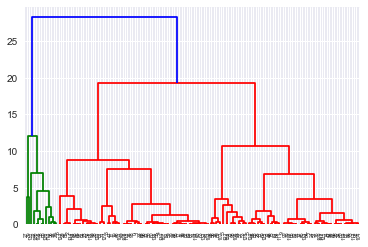

In [34]:
cluster_matrix = np.column_stack((avg_consumption_list, median_marginal_list))
dendrogram = sch.dendrogram(sch.linkage(cluster_matrix, method='ward'))

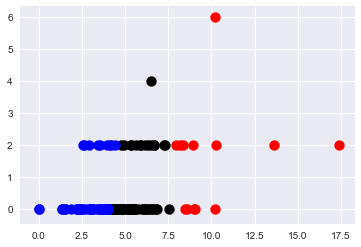

In [35]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(cluster_matrix)
plt.scatter(cluster_matrix[y_hc ==0,0], cluster_matrix[y_hc == 0,1], s=100, c='red')
plt.scatter(cluster_matrix[y_hc==1,0], cluster_matrix[y_hc == 1,1], s=100, c='black')
plt.scatter(cluster_matrix[y_hc ==2,0], cluster_matrix[y_hc == 2,1], s=100, c='blue')
plt.scatter(cluster_matrix[y_hc ==3,0], cluster_matrix[y_hc == 3,1], s=100, c='cyan')

In [36]:
household_list = y_hc

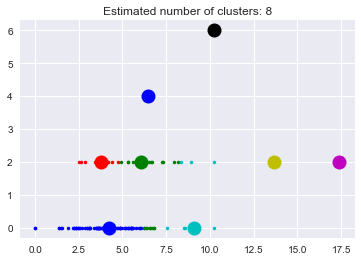

In [37]:
from itertools import cycle

bandwidth = estimate_bandwidth(cluster_matrix, quantile=0.2, n_samples=len(id_list))
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(cluster_matrix)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(cluster_matrix[my_members, 0], cluster_matrix[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

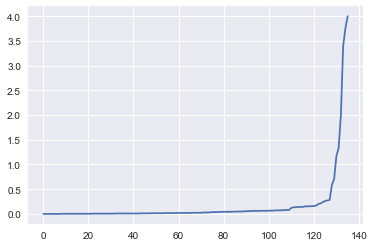

In [38]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(cluster_matrix)
distances, indices = nbrs.kneighbors(cluster_matrix)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

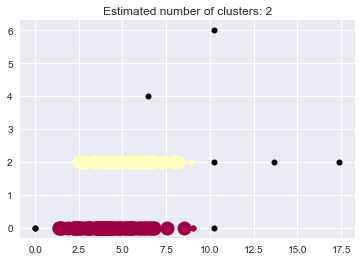

In [39]:
db = DBSCAN(eps=1, min_samples=5).fit(cluster_matrix)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = cluster_matrix[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = cluster_matrix[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Correlation Clustering

In [33]:
df_normalized.head()

index  marginal_change  meterid  TempAvgF  HumidityAvgPercent  \
0 2016-02-01 00:00:00             16.0       35      66.0                73.0   
1 2016-02-01 01:00:00              0.0       35      66.0                73.0   
2 2016-02-01 02:00:00             12.0       35      66.0                73.0   
3 2016-02-01 03:00:00              0.0       35      66.0                73.0   
4 2016-02-01 04:00:00              0.0       35      66.0                73.0   

   WindAvgMPH  norm_cumul_value  time_integer  label  
0         8.0               0.0             0      0  
1         8.0               0.0             1      0  
2         8.0              12.0             2      0  
3         8.0              12.0             3      0  
4         8.0              12.0             4      0

### Construct dataframe over which to run correlation analysis.

In [34]:
df_total = pd.DataFrame()
display(df_total)
for key in new_id_list:
    df_i = new_groups.get_group(key).rename(columns={'norm_cumul_value': f'{key}'}).reset_index()    
    df_total = pd.concat([df_total, df_i[f'{key}']], axis=1)
           
display(len(df_total))
display(df_total)
# column names are meterids

Empty DataFrame
Columns: []
Index: []

697

35      44      77      94     114     187  222     252     370  \
0       0.0     0.0     0.0     0.0     0.0     0.0  0.0     0.0     0.0   
1       0.0     0.0     8.0     0.0     2.0     0.0  0.0    34.0     6.0   
2      12.0     0.0    10.0     0.0    14.0     0.0  0.0    34.0     6.0   
3      12.0     0.0    10.0     0.0    14.0     0.0  0.0    34.0     8.0   
4      12.0    28.0    10.0     2.0    14.0     0.0  0.0    34.0    10.0   
..      ...     ...     ...     ...     ...     ...  ...     ...     ...   
692  1886.0  2006.0  1038.0  4504.0  2520.0  4326.0  0.0  3580.0  2448.0   
693  1886.0  2006.0  1038.0  4504.0  2520.0  4326.0  0.0  3582.0  2448.0   
694  1886.0  2006.0  1038.0  4504.0  2520.0  4326.0  0.0  3582.0  2462.0   
695  1886.0  2006.0  1038.0  4506.0  2520.0  4326.0  0.0  3584.0  2462.0   
696  1888.0  2006.0  1040.0  4506.0  2528.0  4342.0  0.0  3586.0  2462.0   

        483  ...    9134    9278    9295    9474    9631    9639    9729  \
0       0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1       0.0  ...     2.0     0.0     6.0     0.0     0.0     0.0     4.0   
2       0.0  ...     2.0    14.0     6.0     0.0     6.0    10.0     6.0   
3       0.0  ...    20.0    14.0    12.0     0.0     6.0    10.0     6.0   
4       0.0  ...    22.0    18.0    24.0     0.0     6.0    10.0     6.0   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
692  3868.0  ...  7128.0  1754.0  4300.0  4316.0  2518.0  7120.0  2632.0   
693  3868.0  ...  7128.0  1754.0  4300.0  4316.0  2520.0  7120.0  2632.0   
694  3888.0  ...  7132.0  1754.0  4300.0  4324.0  2520.0  7120.0  2634.0   
695  3898.0  ...  7132.0  1754.0  4302.0  4324.0  2520.0  7122.0  2638.0   
696  3898.0  ...  7134.0  1766.0  4302.0  4330.0  2528.0  7122.0  2646.0   

       9766    9849    9982  
0       0.0     0.0     0.0  
1       0.0     0.0     8.0  
2       0.0    42.0     8.0  
3       0.0    42.0    22.0  
4       0.0    42.0    22.0  
..      ...     ...     ...  
692  3688.0  1034.0  2464.0  
693  3688.0  1034.0  2464.0  
694  3688.0  1034.0  2464.0  
695  3688.0  1036.0  2464.0  
696  3690.0  1054.0  2464.0  

[697 rows x 136 columns]

In [35]:
df_total = df_total.fillna(0)

In [36]:
df_corr = df_total.corr()  # get correlations between meterids for the month's cumulative vals.
df_corr = df_corr.fillna(0)
display(df_corr)

35        44        77        94       114       187  222  \
35    1.000000  0.928054  0.995099  0.993597  0.983746  0.984711  0.0   
44    0.928054  1.000000  0.935642  0.929728  0.913702  0.904353  0.0   
77    0.995099  0.935642  1.000000  0.989228  0.975610  0.977124  0.0   
94    0.993597  0.929728  0.989228  1.000000  0.996072  0.995777  0.0   
114   0.983746  0.913702  0.975610  0.996072  1.000000  0.997954  0.0   
...        ...       ...       ...       ...       ...       ...  ...   
9639  0.991435  0.924835  0.987072  0.999538  0.996357  0.996252  0.0   
9729  0.989412  0.922948  0.980041  0.997674  0.996914  0.995377  0.0   
9766  0.986318  0.920418  0.978783  0.997180  0.997775  0.996806  0.0   
9849  0.991105  0.923171  0.996891  0.983740  0.970642  0.973632  0.0   
9982  0.993778  0.936351  0.993138  0.997804  0.992366  0.992899  0.0   

           252       370       483  ...      9134      9278      9295  \
35    0.980459  0.991785  0.968330  ...  0.992645  0.993353  0.990607   
44    0.909700  0.921810  0.895920  ...  0.929115  0.918664  0.919310   
77    0.968558  0.990526  0.954455  ...  0.988161  0.994216  0.985055   
94    0.993892  0.995973  0.987121  ...  0.999842  0.977294  0.998487   
114   0.996659  0.992725  0.994239  ...  0.996259  0.960133  0.997909   
...        ...       ...       ...  ...       ...       ...       ...   
9639  0.995108  0.994908  0.989212  ...  0.999718  0.973897  0.998379   
9729  0.997808  0.991091  0.993092  ...  0.998088  0.968392  0.996969   
9766  0.996573  0.992104  0.993283  ...  0.997410  0.964558  0.997539   
9849  0.961231  0.987835  0.946210  ...  0.982289  0.992839  0.980794   
9982  0.986985  0.997239  0.978381  ...  0.997239  0.981626  0.996754   

          9474      9631      9639      9729      9766      9849      9982  
35    0.994099  0.983715  0.991435  0.989412  0.986318  0.991105  0.993778  
44    0.936133  0.906830  0.924835  0.922948  0.920418  0.923171  0.936351  
77    0.992160  0.974992  0.987072  0.980041  0.978783  0.996891  0.993138  
94    0.992898  0.995818  0.999538  0.997674  0.997180  0.983740  0.997804  
114   0.984216  0.998532  0.996357  0.996914  0.997775  0.970642  0.992366  
...        ...       ...       ...       ...       ...       ...       ...  
9639  0.990740  0.996634  1.000000  0.997915  0.997315  0.981073  0.996474  
9729  0.988950  0.996813  0.997915  1.000000  0.997426  0.973067  0.992826  
9766  0.985602  0.997658  0.997315  0.997426  1.000000  0.972681  0.993416  
9849  0.986579  0.970322  0.981073  0.973067  0.972681  1.000000  0.990093  
9982  0.992780  0.991868  0.996474  0.992826  0.993416  0.990093  1.000000  

[136 rows x 136 columns]

In [37]:
# find top n positive correlations per meterid
n = 10
for meterid in new_id_list[1:2]:    
    # slice is to show an example.
    df_corr_sorted = df_corr[f'{meterid}'].sort_values(ascending=False)
    sr_top5 = df_corr_sorted.iloc[1:1+n]
    df_top5 = sr_top5.to_frame()
    df_top5 = df_top5.rename(columns={f'{meterid}': 'r'})

    data = [meterid for i in range(n)]
    df_top5 = df_top5.assign(id=data)
    display(df_top5)

r  id
8155  0.948046  44
5785  0.945293  44
7460  0.938465  44
9982  0.936351  44
9474  0.936133  44
77    0.935642  44
1415  0.935328  44
744   0.934480  44
2449  0.933765  44
4228  0.933536  44

### Plot all meterids readings on the same graph to observe patterns.

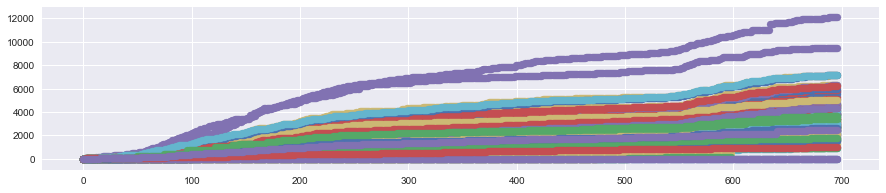

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,3))
# plot
for key in new_id_list:
    axes.scatter(df_total.index, df_total[f'{key}'])

### Perform KMeans clustering on correlation matrix to cluster based on correlations.

In [39]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(df_corr)
labels = kmeans.labels_
print(labels)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


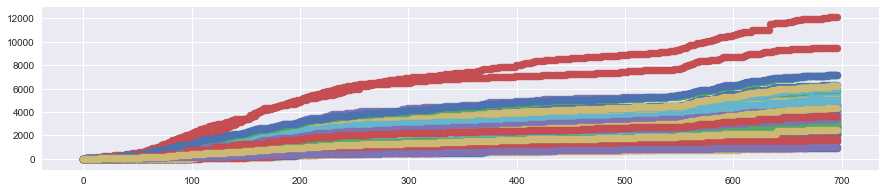

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,3))
i = 0
for key in new_id_list:
    cluster_label = 0
    if labels[i] == cluster_label:
        axes.scatter(df_total.index, df_total[f'{key}'])
    i += 1

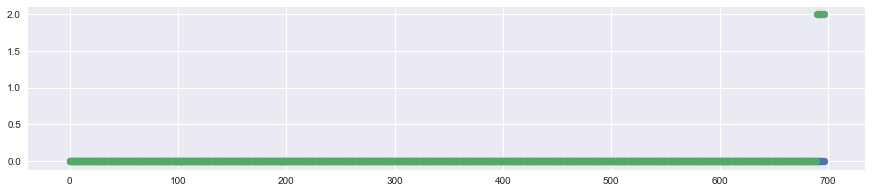

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,3))
i = 0
for key in new_id_list:
    cluster_label = 1
    if labels[i] == cluster_label:
        axes.scatter(df_total.index, df_total[f'{key}'])
    i += 1

In [44]:
# find list of ids belonging to v small clusters.

# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,3))
# i = 0
# list_of_1 = []
# for key in new_id_list:
#     if labels[i] == 1:
#         list_of_1.append(key)
#         axes.scatter(df_total.index, df_total[f'{key}'])
#     i += 1

# display(list_of_1)

In [45]:
# df_corr_clean = df_corr.drop(['222', '6685', '6863'])
# df_corr_clean = df_corr_clean.drop(['222', '6685', '6863'], axis=1)
# df_corr_clean

### Now that we've seen the code and demo for n_cluster == 3. Use code below to set n_clusters to explore clustering. 

In [58]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(df_corr)
labels = kmeans.labels_
print(labels)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [59]:
# for i in list_of_1:
#     new_id_list.remove(i)

In [60]:
# display(new_id_list, len(new_id_list))

### Generate scattterplots for each cluster.

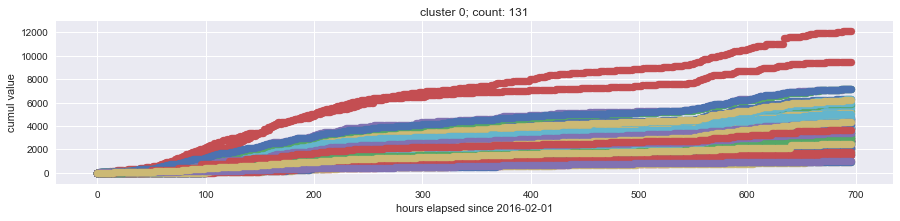

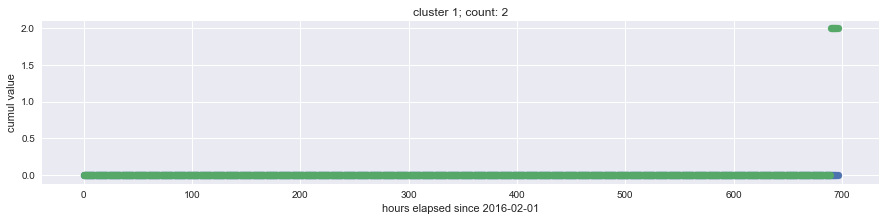

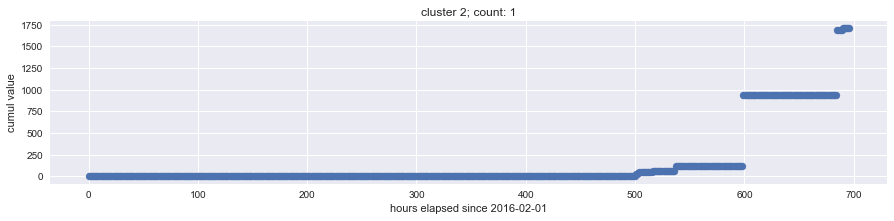

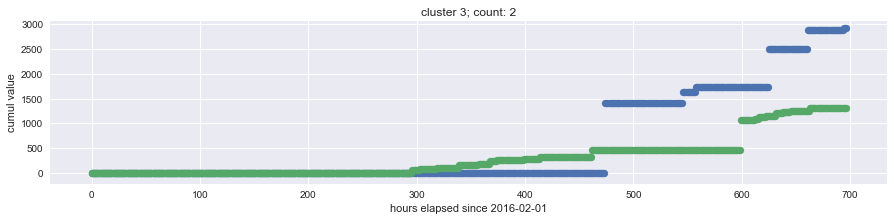

In [61]:
for cluster_label in range(n_clusters):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,3))
    axes.set_title(f'cluster {cluster_label}; count: {list(labels).count(cluster_label)}')
    axes.set_xlabel(f'hours elapsed since {origin_date}')
    axes.set_ylabel(f'cumul value')
    i = 0
    for key in new_id_list:
        if labels[i] == cluster_label:
            axes.scatter(df_total.index, df_total[f'{key}'])
            
        i += 1
        

### Try to account for seasonalities in data. Esp in the marginal changes.

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose

697

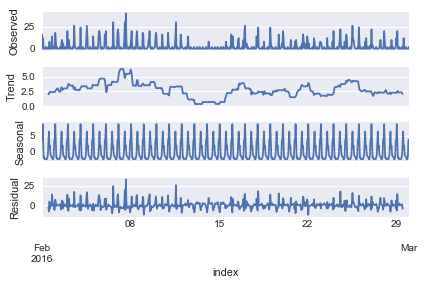

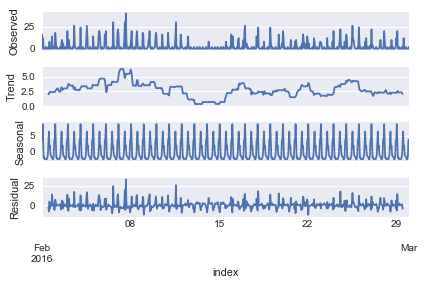

In [65]:
df_i = new_groups.get_group(35)
df_tmp = df_i.set_index('index', drop=True)
result = seasonal_decompose(df_tmp['marginal_change'], model="additive")
display(result.nobs)
result.plot()